In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
from sklearn.datasets import load_boston
df=load_boston()
print(df)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [65]:
x=df.data
y=df.target
print(x.shape)
print(y.shape)
y=list(y)

(506, 13)
(506,)


In [66]:
import pandas as pd
frame=pd.DataFrame(x,columns=df.feature_names)
frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [67]:
import numpy as np
for i in df.feature_names:
    mean=frame[i].mean()
    std=frame[i].std()
    frame[i]=(frame[i]-mean)/std
templ=[]
for i in range(506):
    templ.append(1)
frame.insert(0,"X0",templ,True)
frame.head()

,X0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,1,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,1,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,1,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [98]:
x=frame.values
x.shape

(506, 14)

In [99]:
sp=np.array_split(x,50)
newy=np.array_split(y,50)

In [100]:
len(sp),len(sp[2]),len(sp[0][0]),len(newy[0])

(50, 11, 14, 11)

In [101]:
newx=np.asarray(sp)
newy=np.asarray(newy)
newx.shape,newy.shape


((50,), (50,))

In [102]:
te=newx[0][0].shape
print(te)
type(te)

(14,)


tuple

In [103]:
newx[1][1].shape

(14,)

In [121]:

def hypothesis(x,theta):
    return np.dot(x,theta)
def error(x,y,theta):
    m=x.shape[0]
    ycap=hypothesis(x,theta)
    e=np.sum((y-ycap)**2)
    return e/m
def calculategradient(x,y,theta):
    ycap=hypothesis(x,theta)
    grad=np.dot(x.T,(ycap-y))
    m=x.shape[0]
    return grad/m
def gradientDescent(x,y,max_steps=100,learning_rate=0.1):
    n=len(x[1][1])
    theta=np.zeros((n,))
    error_list=[]
    for i in range(max_steps):
        for j in range(len(x)):
            grad=calculategradient(x[j],y[j],theta)
            theta-=learning_rate*grad
            e=error(x[j],y[j],theta)
            error_list.append(e)
    return theta,error_list



In [122]:
theta,error_list=gradientDescent(newx,newy)
print(theta,error_list)

 26.95048549329913, 18.30205617213421, 26.5706871385176, 23.067369169517054, 31.904283684744634, 10.22414600540512, 19.03439530432807, 9.13082624530161, 9.952759661832598, 12.68318593557149, 10.247193295783935, 11.19211974163852, 7.218966399578848, 6.038929128852485, 15.815069262861105, 2.5983899918642, 2.9083461692517547, 7.821972336303604, 39.473014157072285, 38.18410342684338, 103.19723035379579, 268.11377659946965, 74.60853365041943, 60.099328304563244, 207.2637538257058, 641.6278874147381, 452.42598104762317, 120.79609097380538, 5.678578808405789, 2.2360935400492044, 11.347230629697965, 8.029232075488162, 9.76495705689867, 21.35194847082074, 24.52419728517914, 4.688051461494553, 6.702211622351462, 5.6166355196348094, 8.313512845620869, 23.152528440242296, 3.1995232045838504, 4.031487920528354, 7.492293544119841, 24.041443189602468, 7.1134458164673875, 5.4692192864828275, 2.2634351811035884, 16.038680262834013, 36.01414297319341, 42.62097966254786, 26.95048549330025, 18.30205617213

In [123]:
theta

array([22.13576174, -3.02967828,  0.98671809,  0.20958515,  2.13793671,
       -3.46566237, -0.17794087,  0.3999685 , -1.53080225,  2.39062401,
       -0.67314624, -1.33410446, -0.31582912, -6.46248031])

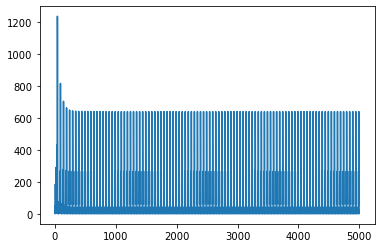

In [124]:
plt.plot(error_list)

In [125]:
error_list[-1]

21.35194847081648

In [126]:
templist=frame.values
ycap=(hypothesis(templist,theta))

y=np.array(y)
def r2score(y,ycap):
    num=np.sum((y-ycap)**2)
    denom=np.sum((y-y.mean())**2)
    score=1-(num/denom)
    return score*100

r2score(y,ycap)

52.02228983908039